# 텐서 차원 - 랭크(rank)

In [1]:
import tensorflow  as tf

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(0)

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])]) #unit 출력값, input_shape : 

In [3]:
model.compile(loss='mse', optimizer = 'sgd')

In [4]:
model.fit([1],[[0,1,0]], epochs=1)
model.evaluate([1],[[0,1,0]])

1/1 [==============================] - 0s 999us/step - loss: 1.0453


1.0453256368637085

In [5]:
history = model.fit([1], [[0, 1, 0]], epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 1.0453
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 1.0176
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.9907
Epoch 4/100
1/1 [==============================] - 0s 1000us/step - loss: 0.9644
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9389
Epoch 6/100
1/1 [==============================] - 0s 1000us/step - loss: 0.9140
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.8898
Epoch 8/100
1/1 [==============================] - 0s 999us/step - loss: 0.8662
Epoch 9/100
1/1 [==============================] - 0s 1000us/step - loss: 0.8433
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.8210
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7992
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 0.7780
Epoch 13/100
1/1 [==============================] - 0s 1

## 손실값 시각화

In [24]:
import matplotlib.pyplot as plt 

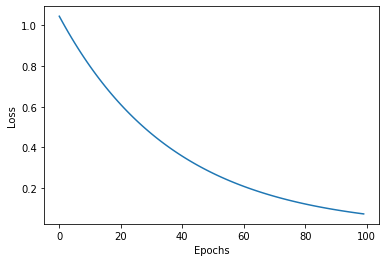

In [25]:
loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Mnist 간단한 훈련 예제  

In [7]:
from tensorflow.keras import datasets
mnist = datasets.mnist

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(keras.layers.Dense(10, activation='softmax'))


In [13]:
model.compile(loss='mse', optimizer='sgd')


In [14]:
#이미지 데이터 훈련할 수 있게 바꾸기
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype('float32') / 25

x_test = x_test.reshape((10000,28*28))
x_test = x_test.astype('float32') / 255

In [15]:
#레이블 준비하기 
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [18]:
model.fit(x_train, y_train, epochs =5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0833
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0497
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0397
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0297
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0198


In [21]:
result = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 821us/step - loss: 0.0730


In [23]:
result


0.07303627580404282

# AND 로직 연산 학습

In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(0)

x_train =[[0,0], [0,1], [1,0],[1,1]]
y_train  = [[0],[0],[0],[1]]

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[2], activation='relu'),
                         keras.layers.Dense(units=1)])


In [29]:
model.compile(loss='mse', optimizer='Adam')

#학습 전
predict_before = model.predict(x_train)
print('Before Training: \n', predict_before)

Before Training: 
 [[0.        ]
 [0.6210649 ]
 [0.06930891]
 [0.6721569 ]]


In [30]:
#모델 훈련
history = model.fit(x_train, y_train, epochs=1000, verbose =0)
predict_training = model.predict(x_train)
print('After Training: \n', predict_training)

After Training: 
 [[-0.00612799]
 [ 0.00896954]
 [ 0.00497065]
 [ 0.9905546 ]]


## 손실값 확인 

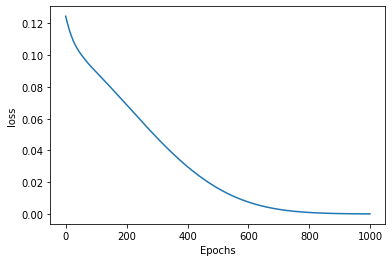

In [33]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

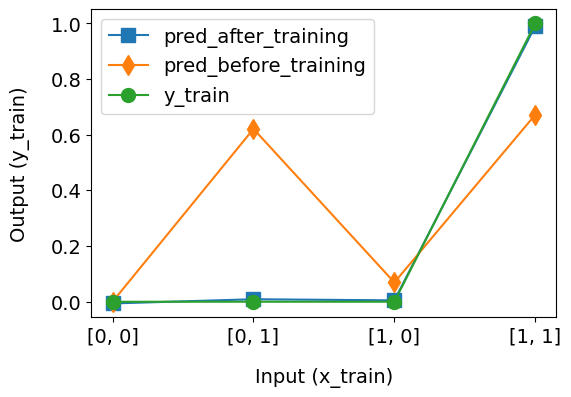

In [34]:
plt.style.use('default')
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['font.size'] = 14

plt.plot(predict_training, 's-', markersize=10, label='pred_after_training')
plt.plot(predict_before, 'd-', markersize=10, label='pred_before_training')
plt.plot(y_train, 'o-', markersize=10, label='y_train')

plt.xticks(np.arange(4), labels=['[0, 0]', '[0, 1]', '[1, 0]', '[1, 1]'])
plt.xlabel('Input (x_train)', labelpad=15)
plt.ylabel('Output (y_train)', labelpad=15)

plt.legend()
plt.show()